# Project: Investigate No-show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">Important References</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this paper we will investigate a dataset that contains information about patients and their appointments, including a column shows if they show up at the appointment or not.

the report aim is to answers a question, what is the main three features make a patient miss his/her appointment?

to score the aim, the report will follow the steps of wrangling the dataset, building new features that hopefully will be more correlated to the dependent feture, then exploring the relations between different features and the 'no-show' feature

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install dython
from dython import nominal


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [116]:

data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [118]:
data["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [119]:
data.describe(include="all")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [120]:
data["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [150]:
pd.cut(data["Age"], 10).value_counts()

(-1.116, 10.6]    18750
(45.4, 57.0]      18675
(33.8, 45.4]      17486
(10.6, 22.2]      15927
(22.2, 33.8]      15423
(57.0, 68.6]      14137
(68.6, 80.2]       7277
(80.2, 91.8]       2610
(91.8, 103.4]       237
(103.4, 115.0]        5
Name: Age, dtype: int64

In [121]:
data.query("Age < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [122]:
mask = data["AppointmentDay"] < data["ScheduledDay"]
data[mask]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,9.876246e+13,5786368,F,2016-06-08T08:20:01Z,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695685e+12,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,0,No


In [147]:
data["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [152]:
data["AppointmentDay"].str.extract("(\d{4}-\d{2})").value_counts()

2016-05    80841
2016-06    26451
2016-04     3235
dtype: int64

In [153]:
data["AppointmentDay"].agg(["min", "max"])

min    2016-04-29T00:00:00Z
max    2016-06-08T00:00:00Z
Name: AppointmentDay, dtype: object

### Assess
   - `AppointmentDay` has no time data, while `ScheduledDay` has
   - `ScheduledDay` and `AppointmentDay` are string not datetime
   - `Age` has negative values
   - some records have `AppointmentDay` less than `ScheduledDay`
   - `No-show` column is confusing
   - too few males comparing to females
   - more than 70% of the data is of one month 'May, 2016' 
   


## Data Cleaning

In [123]:
clean_data = data.copy()

#### Define
   - remove the time part from `ScheduledDay` and `AppointmentDay`

#### Clean & Test

In [124]:
clean_data["ScheduledDay"] = clean_data["ScheduledDay"].str.extract("(.*)T")
clean_data["AppointmentDay"] = clean_data["AppointmentDay"].str.extract("(.*)T")
clean_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Define
   - convert columns `ScheduledDay` and `AppointmentDay` to datetime

#### Clean & Test

In [125]:
clean_data["ScheduledDay"] = pd.to_datetime(clean_data["ScheduledDay"])
clean_data["AppointmentDay"] = pd.to_datetime(clean_data["AppointmentDay"])
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### Define
   - drop the row with age '-1' as it's not a relevant value

#### Clean & Test

In [126]:
clean_data = clean_data[clean_data["Age"] >= 0]
clean_data.query("Age < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Define
   - drop records with `AppointmentDay` less than `ScheduledDay`, as it make no sense and not useful for our prediction model

#### Clean & Test

In [127]:
mask = clean_data["AppointmentDay"] < clean_data["ScheduledDay"]
clean_data = clean_data[~mask]
clean_data[mask]

<ipython-input-127-c1df8a862568>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_data[mask]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Define
   - rename column `No-show` to `missed`, to be more clear 

#### Clean & Test

In [128]:
clean_data = clean_data.rename(columns={"No-show": "missed"})
clean_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,missed
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='fe'></a>
## Feature Engineering

In [129]:
# create a column represent the number of days btw ScheduledDay and AppointmentDay
clean_data["DaysDifference"] = (clean_data["AppointmentDay"] - clean_data["ScheduledDay"]).map(lambda delt: delt.days)
clean_data["DaysDifference"].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
101        1
132        1
151        1
146        1
127        1
Name: DaysDifference, Length: 129, dtype: int64

In [132]:
# create a new column for the count of previous absence
def create_absence_history(group):
    group["noShowCount"] = group["missed"].replace({"No": 0, "Yes": 1}).shift().cumsum().fillna(0)
    return group

clean_data = clean_data.sort_values("AppointmentDay").groupby("PatientId").apply(create_absence_history)

In [133]:
clean_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,missed,DaysDifference,noShowCount
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0.0
2151,7.257760e+11,5521232,M,2016-03-29,2016-04-29,33,MARIA ORTIZ,0,0,0,0,0,1,No,31,0.0
2152,9.475572e+13,5521230,F,2016-03-29,2016-04-29,50,MARIA ORTIZ,0,0,0,0,0,0,No,31,0.0
2153,3.538755e+13,5523393,F,2016-03-29,2016-04-29,69,MARIA ORTIZ,0,0,0,0,0,1,No,31,0.0
2154,7.324990e+14,5642808,F,2016-04-29,2016-04-29,65,MARIA ORTIZ,0,0,0,0,0,0,No,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92055,6.618378e+13,5789482,M,2016-06-08,2016-06-08,24,MARIA ORTIZ,0,0,0,0,0,0,No,0,0.0
99217,8.242474e+13,5779081,F,2016-06-06,2016-06-08,54,JESUS DE NAZARETH,0,1,0,0,0,0,No,2,0.0
99218,4.137343e+12,5779077,F,2016-06-06,2016-06-08,50,SANTA MARTHA,0,1,0,0,0,0,No,2,0.0
99224,7.821984e+14,5779066,F,2016-06-06,2016-06-08,64,SANTA TEREZA,0,1,1,0,0,0,No,2,0.0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the main three features make a patient miss his/her appointment?)

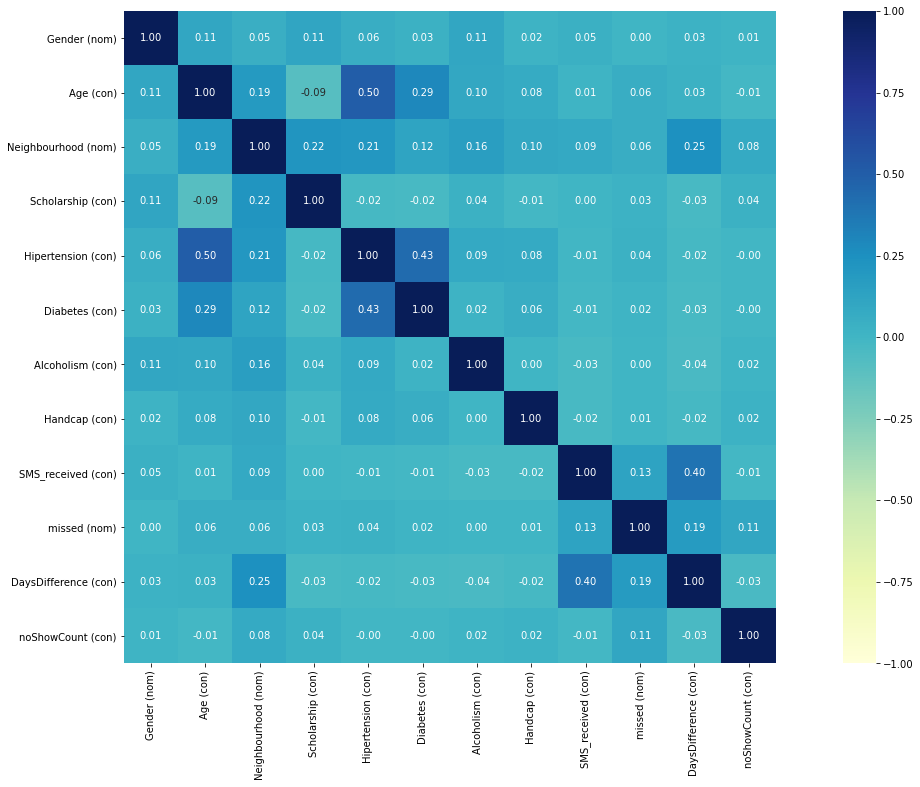

In [134]:
# first of all let's find the correlation btw. the variables
nominal.associations(clean_data.drop(columns=["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"]), 
                                     figsize=(24,12),mark_columns=True, cmap="YlGnBu");


#### Seems like there are no strong correlation between missing the appointment and any of the variables, however `SMS_received`, `DaysDifference` and `noShowCount` are the most related variables 

In [135]:
# let's investigate the correlation of `SMS_received` and missing the appointment
def calculate_pct(row):
    return np.round(row / row.sum() * 100, 2)

temp = clean_data.groupby(["SMS_received", "missed"]).PatientId.count().unstack().apply(calculate_pct, axis=1)
temp

missed,No,Yes
SMS_received,,
0,83.30,16.70
1,72.43,27.57


<AxesSubplot:xlabel='SMS_received', ylabel='percentage'>

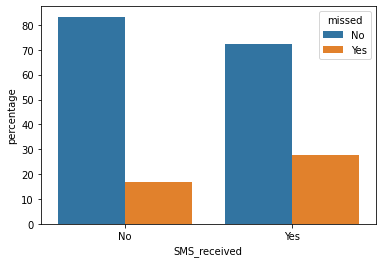

In [136]:
temp = temp.stack().reset_index().rename(columns={0: "percentage"}).replace({0: "No", 1: "Yes"})
sns.barplot(data=temp, x="SMS_received", y="percentage", hue="missed", )

#### strangly the people who recieve SMS are more likely to miss their appointment, however, since their are high correlation between SMS received and the number of days between schedule and appointment then let's investigate this variable

<Figure size 1728x864 with 0 Axes>

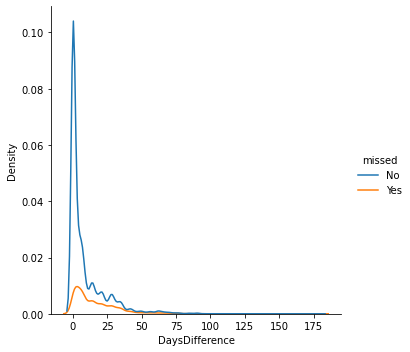

In [137]:
plt.figure(figsize=(24, 12))
sns.displot(data=clean_data, x="DaysDifference", kind="kde", hue="missed")
plt.show()

> Unfortunatly, the distribution is not showing clearly if there is a relation between Days between schedule and the actual appointment, and missing the appointment.

#### Hence, we will divide the DaysDifference into categories and investigate more 

In [138]:
temp = pd.cut(clean_data["DaysDifference"], bins=[0, 2, 4, 8, 16, 32, 64, 128, 256], right=False
            , labels=[f"{2**i if i != 0 else 0}-{2**(i+1)}" for i in range(8)])
temp

0          0-2
2151     16-32
2152     16-32
2153     16-32
2154       0-2
         ...  
92055      0-2
99217      2-4
99218      2-4
99224      2-4
91900     8-16
Name: DaysDifference, Length: 110521, dtype: category
Categories (8, object): ['0-2' < '2-4' < '4-8' < '8-16' < '16-32' < '32-64' < '64-128' < '128-256']

In [139]:
clean_data["missed"].replace({"No": 0, "Yes": 1}).std()

0.4014185142289168

In [140]:
clean_data["missed"].replace({"No": 0, "Yes": 1}).groupby(temp).agg(["mean", "std", "count"])

,mean,std,count
DaysDifference,,,
0-2,0.066362,0.248917,43775
2-4,0.237371,0.425494,9462
4-8,0.252027,0.434189,17510
8-16,0.307954,0.461664,13528
16-32,0.325212,0.468468,16540
32-64,0.335791,0.472295,8139
64-128,0.298187,0.457616,1489
128-256,0.358974,0.482805,78


> Among the first group the STD droped by a significant amount, which means that patients amoung this group are more alike each other. Let's dig more here

<Figure size 1152x576 with 0 Axes>

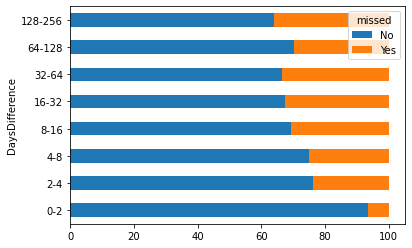

In [141]:
plt.figure(figsize=(16, 8))
clean_data.groupby([temp, clean_data["missed"]])["PatientId"].count().unstack().apply(calculate_pct, axis=1).plot.barh(stacked=True)

plt.show()

#### There are almost a trend, as patients schedule their appointment earlier, they are more likely to miss it.
The last variable that have a significant correlation with missing the appointment is; `noShowCount`, hence let's see if the patient who miss once tends to miss again or not. 

In [142]:
clean_data["noShowCount"].value_counts()

0.0     94914
1.0     11593
2.0      2584
3.0       789
4.0       305
5.0       142
6.0        70
7.0        33
8.0        30
9.0        20
11.0       13
10.0       12
12.0        5
13.0        4
14.0        3
15.0        2
17.0        1
16.0        1
Name: noShowCount, dtype: int64

In [143]:
temp = clean_data["noShowCount"].map(lambda v: 1 if v > 0 else 0)
temp.rename("PreviousMiss", inplace=True)
temp

0        0
2151     0
2152     0
2153     0
2154     0
        ..
92055    0
99217    0
99218    0
99224    0
91900    1
Name: PreviousMiss, Length: 110521, dtype: int64

In [144]:
clean_data["missed"].replace({"No": 0, "Yes": 1}).groupby(temp).agg(["mean", "std"])

,mean,std
PreviousMiss,,
0,0.186074,0.389168
1,0.298135,0.457454


> within the group of patients who never miss before, as the stunder deviation droped, it means they are more alike each other. It didn't drop by much, however, it worth more investigation.

<AxesSubplot:ylabel='PreviousMiss'>

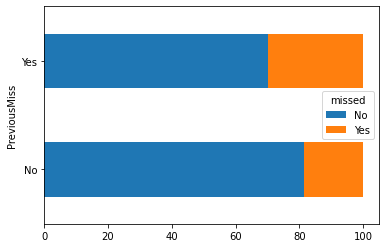

In [145]:
clean_data.groupby([temp.replace({0: "No", 1: "Yes"}), clean_data["missed"]])["PatientId"].count().unstack().apply(calculate_pct, axis=1).plot.barh(stacked=True)


#### The chart clearly shows that patient who miss once are more likely to miss again

<a id='conclusions'></a>
## Conclusions

> Although, we have a lot of features which seem affecting the patient appointment missing, exploration analysis showed that none of them have a significant infelunce on missing the appointment. However, we can state three of the features that may help to make a rough prediction two of them are coorelated **SMS_recived** and **DaysDeference**, then the last one is **previous miss**.

> patients who make appointments in range of two days early tend to attend their appointment by a percent more than 90, this percent drop to below 70, for the patient who made their appointments more than a week a head.

> patients who miss their appointment once before, are 10% more likely to miss their new appointment.

### Limitations
> Data is quite in a good shape, however, two limitations sighted within the dataset, first; the dataset contains 15% more females than males, another issue is having more than 70% of the data from one month

<a id='action'></a>
### Call to Action
> It may be useful if the hospital limit prebooking to be only a week ahead, we recommend studying this option more and include records of other months. 


In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

<a id='references'></a>
## Important References:
   - [An overview of correlation measures between categorical and continuous variables](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365)
   - [Correlation between categorical and continuous variable](https://www.kaggle.com/questions-and-answers/181332)
   - [Exploratory data analysis in Python.](https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce)
   - [Pandas groupby cumulative sum ignore current row](https://stackoverflow.com/questions/60709083/pandas-groupby-cumulative-sum-ignore-current-row)